In [46]:
# import matplotlib.pyplot as plt

# plt.rcParams["font.family"] = 'NanumBarunGothicOTF'
#plt.rcParams["font.size"] = 20
#plt.rcParams["figure.figsize"] = (14,4)

In [57]:
from matplotlib import rc, font_manager

path = 'C:/Windows/Fonts/NanumBarunGothic.ttf'
font = font_manager. FontProperties(fname=path).get_name()
rc('font', family=font)

In [59]:
from nltk.tag.stanford import StanfordPOSTagger

MODEL = r'C:\Users\USER\Desktop\stanford-postagger-full-2018-10-16\models\english-bidirectional-distsim.tagger'
PARSER = r'C:\Users\USER\Desktop\stanford-postagger-full-2018-10-16\stanford-postagger-3.9.2.jar'
pos = StanfordPOSTagger(MODEL, PARSER)

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize

pos.tag(word_tokenize(sent_tokenize(corpus)[0]))

OSError: [WinError 193] %1은(는) 올바른 Win32 응용 프로그램이 아닙니다

In [4]:
def splitTerm(term):
    result = list()
    for token in term.split():
        result.append(' '.join(list(term) + ['</w>']))
    return '_'.join(result)

In [6]:
def ngram(data, n=2):
    result = defaultdict(int)

    for term, freq in data.items():
        tokens = term.split()
        for i in range(len(tokens) - (n-1)):
            result[' '.join(tokens[i:i+n])] += freq
    return result

In [52]:
from nltk import Text
from nltk.tokenize import sent_tokenize, word_tokenize
from konlpy.corpus import kolaw, kobill

corpus = kolaw.open(kolaw.fileids()[0]).read()

def eojeol(text, n =2):
    tokens = text.split()
    ngram = list()

    for i in range(len(tokens)-(n-1)):
        ngram.append(' '.join(tokens[i:i+n]))
    return ngram

for _ in sent_tokenize(corpus):
    print(eojeol(_))
    break

def umjeol(text, n =2):
    ngram = list()

    for i in range(len(text)-(n-1)):
        ngram.append(''.join(text[i:i+n]))
    return ngram

for _ in sent_tokenize(corpus):
    print(umjeol(_))
    break

['대한민국헌법 유구한', '유구한 역사와', '역사와 전통에', '전통에 빛나는', '빛나는 우리', '우리 대한국민은', '대한국민은 3·1운동으로', '3·1운동으로 건립된', '건립된 대한민국임시정부의', '대한민국임시정부의 법통과', '법통과 불의에', '불의에 항거한', '항거한 4·19민주이념을', '4·19민주이념을 계승하고,', '계승하고, 조국의', '조국의 민주개혁과', '민주개혁과 평화적', '평화적 통일의', '통일의 사명에', '사명에 입각하여', '입각하여 정의·인도와', '정의·인도와 동포애로써', '동포애로써 민족의', '민족의 단결을', '단결을 공고히', '공고히 하고,', '하고, 모든', '모든 사회적', '사회적 폐습과', '폐습과 불의를', '불의를 타파하며,', '타파하며, 자율과', '자율과 조화를', '조화를 바탕으로', '바탕으로 자유민주적', '자유민주적 기본질서를', '기본질서를 더욱', '더욱 확고히', '확고히 하여', '하여 정치·경제·사회·문화의', '정치·경제·사회·문화의 모든', '모든 영역에', '영역에 있어서', '있어서 각인의', '각인의 기회를', '기회를 균등히', '균등히 하고,', '하고, 능력을', '능력을 최고도로', '최고도로 발휘하게', '발휘하게 하며,', '하며, 자유와', '자유와 권리에', '권리에 따르는', '따르는 책임과', '책임과 의무를', '의무를 완수하게', '완수하게 하여,', '하여, 안으로는', '안으로는 국민생활의', '국민생활의 균등한', '균등한 향상을', '향상을 기하고', '기하고 밖으로는', '밖으로는 항구적인', '항구적인 세계평화와', '세계평화와 인류공영에', '인류공영에 이바지함으로써', '이바지함으로써 우리들과', '우리들과 우리들의', '우리들의 자손의', '자손의 안전과', '안전과 자유와', '자유와 행복을', '행복을 영원히', '영원히 확보할', '확보할 것을', '것을 다짐하면서', '다짐하면서 1948년', '1948년 7월

In [16]:
from nltk import punkt
from collections import defaultdict
import re

def mergerNgram(maxKey, data):
    newData = dict()

    for term, freq in data.items():
        newKey = re.sub(maxKey, maxKey.replace(' ', ''), term)
        newData[newKey] = freq

    return newData

data = {
    splitTerm('low'):5,
    splitTerm('lowest'):2,
    splitTerm('newer'):6,
    splitTerm('wider'):3
}

for _ in range(5):
    bigram = ngram(data)
    maxKey = max(bigram, key=bigram.get)
    data = mergerNgram(maxKey, data)

In [86]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [88]:
import nltk
import re
from string import punctuation

#nltk.download('punctuation')
#nltk.download('averaged_perceptron_tagger')

sentence = "She sells seashells on the seashore."

tokens = word_tokenize(sentence.lower())
tokens = [_ for _ in tokens if not re.search(r"[{0}]".format(punctuation), _)]

print(tokens)

['she', 'sells', 'seashells', 'on', 'the', 'seashore']


In [18]:
from nltk import pos_tag
from nltk.help import upenn_tagset

pos_tag(tokens)

[('she', 'PRP'),
 ('sells', 'VBZ'),
 ('seashells', 'NNS'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('seashore', 'NN'),
 ('.', '.')]

In [19]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [20]:
nltk.download('corpus')

[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [21]:
nltk.download("averaged_perceptron_tagger")
nltk.download("tagsets")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [22]:
from nltk.corpus import gutenberg

#nltk.download()

corpus = gutenberg.open("austen-emma.txt").read()
posTags = pos_tag(word_tokenize(corpus.lower()))

In [23]:
import nltk
nltk.download('tagsets')

upenn_tagset("IN")
upenn_tagset("DT")

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [24]:
[_[0] for _ in pos_tag(tokens) if _[1] not in ["DT", "IN"]]

['she', 'sells', 'seashells', 'seashore', '.']

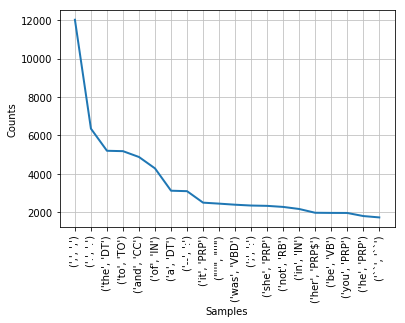

None


In [26]:
print(Text(posTags).plot(20))

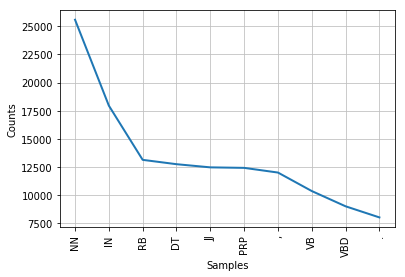

None


In [27]:
print(Text([_ [1] for _ in posTags]).plot(10))

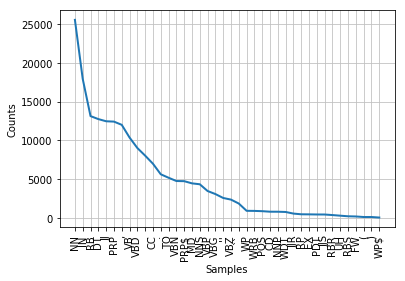

None


In [28]:
print(Text([_ [1] for _ in posTags]).plot())

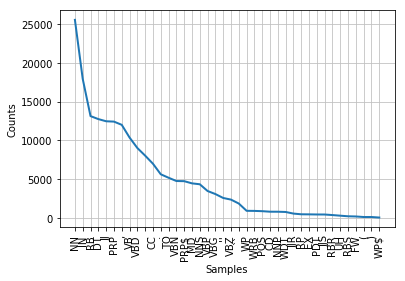

None


In [52]:
print(Text([_ [1] for _ in posTags]).plot(50))

In [89]:
sentence = "The little yellow dog barked at the Persian Cat."

tokens = word_tokenize(sentence.lower())
tokens = [_ for _ in tokens if not re.search(r"[{0}]".format(punctuation), _)]

print(tokens)

print(pos_tag(tokens))
print([_[0] for _ in pos_tag(tokens) if _[1] not in ["DT", "IN"]])

['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'persian', 'cat']
[('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('persian', 'JJ'), ('cat', 'NN')]
['little', 'yellow', 'dog', 'barked', 'persian', 'cat']


### 한글!

In [2]:
!pip install konlpy

In [33]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt

#ex ) 아이폰 을 아이, 폰으로 분석하는 건 별 필요 x

#띄어쓰기 성능
#kkma = komoran > okt > hannanum
sentence1 = "아버지가방에들어가신다"
# 형태소 분석
#kkma = komoran > 
sentence2 = "아버지가 방에 들어가신다"
# 신조어/비속어
sentence3 = "아이폰 갤럭시 안드로이드 창렬하다 혜자스럽게"

hannanum = Hannanum()
print(hannanum.pos(sentence1), "\n")
print(hannanum.pos(sentence2), "\n")
print(hannanum.pos(sentence3), "\n")

okt = Okt()
print(okt.pos(sentence1), "\n")
print(okt.pos(sentence2), "\n")
print(okt.pos(sentence3), "\n")

kom = Komoran()
print(kom.pos(sentence1), "\n")
print(kom.pos(sentence2), "\n")
print(kom.pos(sentence3), "\n")

ma = Kkma()
print(ma.pos(sentence1), "\n")
print(ma.pos(sentence2), "\n")
print(ma.pos(sentence3), "\n")

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')] 

[('아버지', 'N'), ('가', 'J'), ('방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('시ㄴ다', 'E')] 

[('아이폰', 'N'), ('갤럭시', 'N'), ('안드로이드', 'N'), ('창렬하다', 'N'), ('혜자스럽', 'N'), ('게', 'J')] 

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')] 

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')] 

[('아이폰', 'Noun'), ('갤럭시', 'Noun'), ('안드로이드', 'Noun'), ('창렬하', 'Noun'), ('다', 'Josa'), ('혜자', 'Noun'), ('스럽게', 'Josa')] 

[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')] 

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')] 

[('아이폰', 'NNP'), ('갤럭시', 'NNP'), ('안드로이드', 'NNP'), ('창려', 'NNP'), ('ㄹ', 'JKO'), ('하', 'VV'), ('다', 'EC'), ('혜자', 'NNP'), ('스럽', 'XSA'), ('게', 'EC')] 

[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')] 

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에

In [34]:
print(hannanum.tagset, "\n")
print(ma.tagset, "\n")
print(kom.tagset, "\n")
print(okt.tagset, "\n")

{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'} 

{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일

In [63]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()

In [16]:
sent_tokenize(corpus)

['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.',
 '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.',
 '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.',
 '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.',
 '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.',
 '제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.',
 '제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.',
 '제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.',
 '②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.',
 '제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.',
 '②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.',
 '제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.',
 '②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 

In [97]:
tokens1 = list() #원시 어절
tokens2 = list() #품사분석(튜플)
tokens3 = list() #형태소
tokens4 = list() #품사
for sentence in sent_tokenize(corpus):
    tokens = word_tokenize(sentence)
    for token in tokens:
        tokens1.append(token)
        tokens2.extend(ma.pos(token))
        tokens3.extend([_[0] for _ in ma.pos(token)])
        tokens4.extend([_[1] for _ in ma.pos(token)])

In [37]:
len(set(tokens1)), len(set(tokens2)), len(set(tokens3)), len(set(tokens4))

(2023, 1263, 1230, 39)

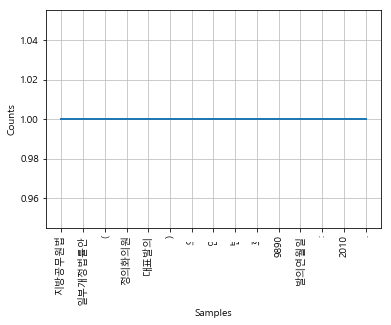

None


In [100]:
print(Text(tokens).plot(50))

In [39]:
print(kom.morphs("아버지가 방에 들어가신다."), "\n")
print(kom.pos("아버지가 방에 들어가신다."),  "\n")
print(kom.nouns("아버지가 방에 들어가신다. 아버지가 방에 들어가신다."),  "\n")

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.'] 

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EF'), ('.', 'SF')] 

['아버지', '방', '아버지', '방'] 



In [40]:
Kkma().nouns("아버지가 방에 들어가신다. 아버지가 방에 들어가신다.")

['아버지', '방']

In [71]:
print(font)

NanumBarunGothic


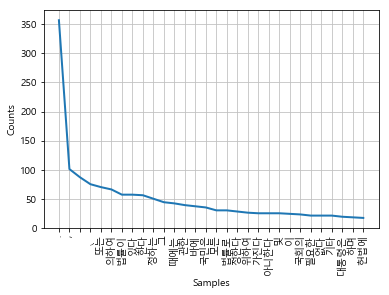

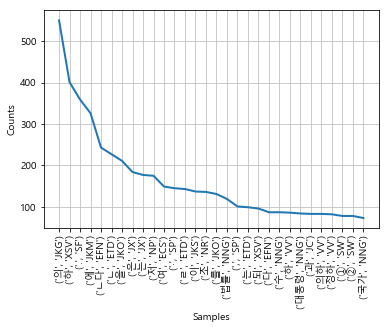

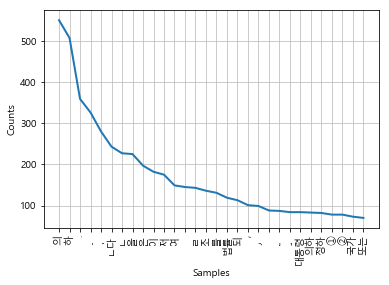

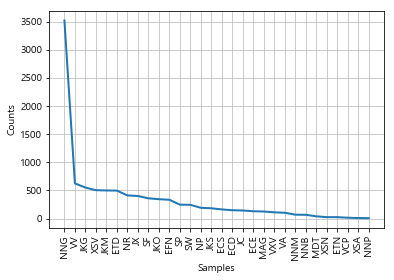

(None, None, None, None)

In [72]:
#plt.rcParams["font.family"] = 'NanumBarunGothicOTF'
# path = 'C:/Windows/Fonts/malgun.ttf'
# font = font_manager. FontProperties(fname=path).get_name()
# rc('font', family=font)

Text(tokens1).plot(30), Text(tokens2).plot(30), Text(tokens3).plot(30), \
Text(tokens4).plot(30)

In [43]:
from nltk.probability import FreqDist

FreqDist()

FreqDist({})

In [74]:
tokens1 = FreqDist(tokens1) #원시 어절
tokens2 = FreqDist(tokens2) #품사분석(튜플)
tokens3 = FreqDist(tokens3) #형태소
tokens4 = FreqDist(tokens4) #품사
# for sentence in sent_tokenize(corpus):
#     tokens = word_tokenize(sentence)
#     for token in tokens:
#         tokens1.append(token)
#         tokens2.extend(ma.pos(token))
#         tokens3.extend([_[0] for _ in ma.pos(token)])
#         tokens4.extend([_[1] for _ in ma.pos(token)])

In [75]:
(tokens1.N(), tokens1.B()), \
(tokens2.N(), tokens2.B()), \
(tokens3.N(), tokens3.B()), \
(tokens4.N(), tokens4.B())

((4640, 2023), (10081, 1263), (10081, 1230), (10081, 39))

In [76]:
tokens2[tokens2.max()]
tokens2.freq(tokens2.max())

0.054558079555599645

In [77]:
x = [_[0] for _ in tokens1.most_common(50)]
#range(1, 51)
y = [_[1] for _ in tokens1.most_common(50)]

In [78]:
x, y

(['.',
  ',',
  '수',
  '①',
  '또는',
  '의하여',
  '법률이',
  '있다',
  '한다',
  '정하는',
  '그',
  '때에는',
  '관한',
  '바에',
  '국민은',
  '모든',
  '법률로',
  '정한다',
  '위하여',
  '가진다',
  '아니한다',
  '및',
  '이',
  '국회의',
  '필요한',
  '없다',
  '기타',
  '대통령은',
  '하며',
  '헌법에',
  '대통령이',
  '이를',
  '할',
  '사항은',
  '의무를',
  '국가의',
  '진다',
  '국가는',
  '이상의',
  '국회는',
  '임기는',
  '권리를',
  '관하여',
  '법률에',
  '다만',
  '대통령의',
  '대한',
  '받지',
  '의한',
  '있어서'],
 [357,
  101,
  87,
  75,
  70,
  66,
  57,
  57,
  56,
  50,
  44,
  42,
  39,
  37,
  35,
  30,
  30,
  28,
  26,
  25,
  25,
  25,
  24,
  23,
  21,
  21,
  21,
  19,
  18,
  17,
  16,
  15,
  15,
  15,
  14,
  14,
  13,
  13,
  13,
  13,
  13,
  12,
  12,
  11,
  11,
  11,
  10,
  10,
  10,
  9])

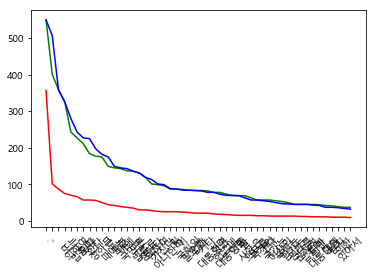

In [79]:
import matplotlib.pyplot as plt

n = 50

x = [_[0] for _ in tokens1.most_common(n)]
#range(1, 51)
y = [_[1] for _ in tokens1.most_common(n)]
yy = [_[1] for _ in tokens2.most_common(n)]
yyy = [_[1] for _ in tokens3.most_common(n)]

plt.plot(x, y, "r-")
plt.plot(x, yy, "g-")
plt.plot(x, yyy, "b-")
plt.xticks(rotation=45)
plt.show()

In [61]:
temp = FreqDist()
for k,v in tokens2.items():
    if not k[1].startswith("E") and not k[1].startswith("J") and not k[1].startswith("S") \
    and len(k[0]) > 1:
        temp[k] += v

temp.most_common(n)    
#[(k,v) for k, v in tokens2.items() if k[1].startswith("E")]

[(('법률', 'NNG'), 119),
 (('대통령', 'NNG'), 84),
 (('의하', 'VV'), 83),
 (('정하', 'VV'), 82),
 (('국가', 'NNG'), 73),
 (('또는', 'MAG'), 70),
 (('헌법', 'NNG'), 69),
 (('국민', 'NNG'), 69),
 (('아니하', 'VXV'), 53),
 (('회의', 'NNG'), 50),
 (('국회', 'NNG'), 45),
 (('모든', 'MDT'), 37),
 (('가지', 'VV'), 32),
 (('필요', 'NNG'), 31),
 (('위원', 'NNG'), 31),
 (('위하', 'VV'), 27),
 (('선거', 'NNG'), 27),
 (('기타', 'NNG'), 26),
 (('보장', 'NNG'), 24),
 (('국무', 'NNG'), 24),
 (('정부', 'NNG'), 23),
 (('사항', 'NNG'), 23),
 (('자유', 'NNG'), 21),
 (('권리', 'NNG'), 21),
 (('의원', 'NNG'), 21),
 (('대하', 'VV'), 20),
 (('의무', 'NNG'), 20),
 (('국회의원', 'NNG'), 20),
 (('직무', 'NNG'), 19),
 (('국무총리', 'NNG'), 19),
 (('임명', 'NNG'), 19),
 (('경제', 'NNG'), 18),
 (('조직', 'NNG'), 18),
 (('임기', 'NNG'), 18),
 (('의결', 'NNG'), 17),
 (('경우', 'NNG'), 17),
 (('이상', 'NNG'), 17),
 (('법원', 'NNG'), 17),
 (('공무원', 'NNG'), 16),
 (('단체', 'NNG'), 16),
 (('범위', 'NNG'), 16),
 (('보호', 'NNG'), 15),
 (('이르', 'VV'), 15),
 (('법관', 'NNG'), 15),
 (('관하', 'VV'), 15),
 (('행정', 

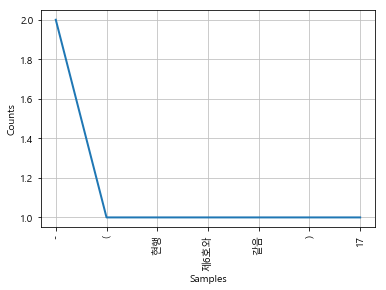

None


In [105]:
corpus = "\n".join([kobill.open(_).read() for _ in kobill.fileids()])

tokens1 = list() #원시 어절
tokens2 = list() #품사분석(튜플)
tokens3 = list() #형태소
tokens4 = list() #품사
for sentence in sent_tokenize(corpus):
    tokens = word_tokenize(sentence)
    for token in tokens:
        tokens1.append(token)
        tokens2.extend(ma.pos(token))
        tokens3.extend([_[0] for _ in ma.pos(token)])
        tokens4.extend([_[1] for _ in ma.pos(token)])
        
print(Text(tokens).plot(50))

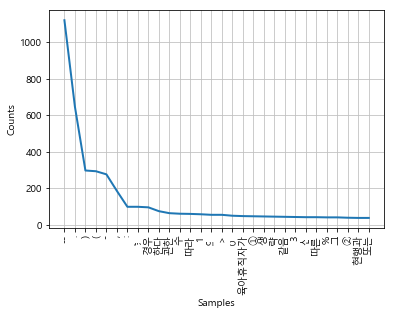

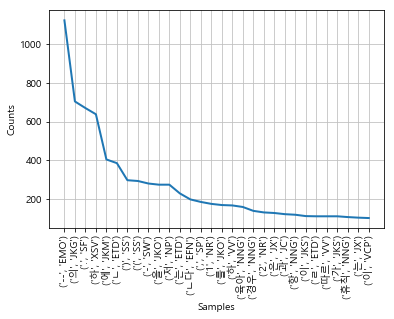

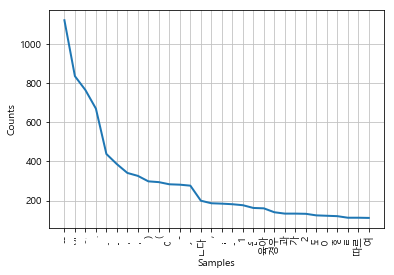

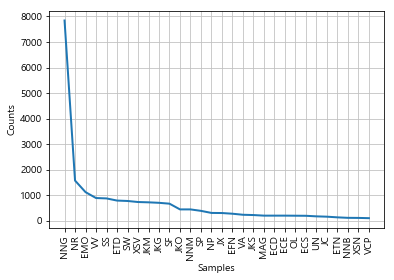

(None, None, None, None)

In [106]:
Text(tokens1).plot(30), Text(tokens2).plot(30), Text(tokens3).plot(30), \
Text(tokens4).plot(30)

In [107]:
tokens1 = FreqDist(tokens1) #원시 어절
tokens2 = FreqDist(tokens2) #품사분석(튜플)
tokens3 = FreqDist(tokens3) #형태소
tokens4 = FreqDist(tokens4) #품사

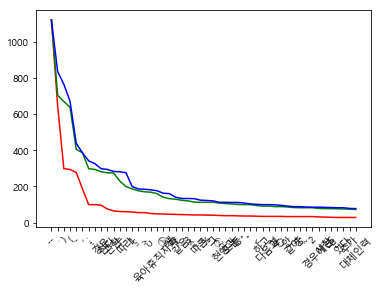

In [108]:
n = 50

x = [_[0] for _ in tokens1.most_common(n)]
#range(1, 51)
y = [_[1] for _ in tokens1.most_common(n)]
yy = [_[1] for _ in tokens2.most_common(n)]
yyy = [_[1] for _ in tokens3.most_common(n)]

plt.plot(x, y, "r-")
plt.plot(x, yy, "g-")
plt.plot(x, yyy, "b-")
plt.xticks(rotation=45)
plt.show()

In [114]:
temp = FreqDist()
for k,v in tokens2.items():
    if not k[1].startswith("E") and not k[1].startswith("J") and not k[1].startswith("S") \
    and len(k[0]) > 1:
        temp[k] += v

temp.most_common(n)

[(('육아', 'NNG'), 160),
 (('경우', 'NNG'), 140),
 (('따르', 'VV'), 112),
 (('휴직', 'NNG'), 108),
 (('이하', 'NNG'), 91),
 (('비용', 'NNG'), 82),
 (('발생', 'NNG'), 82),
 (('예고', 'NNG'), 70),
 (('10', 'NR'), 69),
 (('휴직자', 'NNG'), 68),
 (('결혼', 'NNG'), 66),
 (('부대', 'NNG'), 65),
 (('대체', 'NNG'), 64),
 (('공무원', 'NNG'), 63),
 (('파견', 'NNG'), 63),
 (('다음', 'NNG'), 60),
 (('고용', 'NNG'), 60),
 (('사항', 'NNG'), 55),
 (('자녀', 'NNG'), 54),
 (('인력', 'NNG'), 49),
 (('교육', 'NNG'), 48),
 (('행정', 'NNG'), 48),
 (('2011', 'NR'), 47),
 (('개정', 'NNG'), 46),
 (('현행', 'NNG'), 46),
 (('법률', 'NNG'), 44),
 (('법령', 'NNG'), 43),
 (('중개', 'NNG'), 42),
 (('가정', 'NNG'), 39),
 (('입법', 'NNG'), 39),
 (('또는', 'MAG'), 38),
 (('국제', 'NNG'), 37),
 (('해당', 'NNG'), 36),
 (('지급', 'NNG'), 36),
 (('월급', 'NNG'), 36),
 (('이상', 'NNG'), 35),
 (('내용', 'NNG'), 33),
 (('같이', 'MAG'), 33),
 (('추가', 'NNG'), 33),
 (('일부', 'NNG'), 32),
 (('11', 'NR'), 32),
 (('급여액', 'NNG'), 32),
 (('대하', 'VV'), 32),
 (('필요', 'NNG'), 31),
 (('연령', 'NNG'), 31),
 (('12

In [115]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

bigram = BigramCollocationFinder.from_words(temp)
#bigram.nbest(BigramAssocMeasures().chi_sq, 10)
bigram.nbest(BigramAssocMeasures.pmi, 10)

[(('-4649', 'NR'), ('tanzania', 'OL')),
 (('-5', 'NR'), ('자나', 'VV')),
 (('-50', 'NR'), ('공의', 'NNG')),
 (('0.056', 'NR'), ('0.6', 'NR')),
 (('0.6', 'NR'), ('10.7', 'NR')),
 (('01', 'NR'), ('28', 'NR')),
 (('02', 'NR'), ('748', 'NR')),
 (('02-788', 'OL'), ('-4649', 'NR')),
 (('04', 'NR'), ('과도', 'NNG')),
 (('05', 'NR'), ('06', 'NR'))]